In [1]:
from create_data import DumbCirc as dc
from create_data_single import Dumb as db
from create_data_single import Circ as cc
from augsuq import AugmentedSUQ as auq
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data_instance = cc(0.4, 0.4, 0.2, 22)
fpc, fnc, pc, lp, tc, lt = data_instance.create_dataset(50, 1, [100], [0.2], True, 10)

In [3]:
import torch
torch.manual_seed(22)
fpc, fnc, pc, lp, tc, lt = torch.tensor(fpc), torch.tensor(fnc), torch.tensor(pc), torch.tensor(lp), torch.tensor(tc), torch.tensor(lt)

In [4]:
model_bin = auq(point_cloud=fpc, partial_cloud=pc, test_partial=tc, train_labels=lp,  mapping_dim=5, grid_size=125, negative_cloud=fnc)

In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
# device = "cpu"
model_bin.set_device(device)

In [6]:
model_bin.train(num_epochs=50, batch_size=20, learning_rate=0.00005, kind='b')

/servers/ash/hdd-home3/dghosh/Documents/Thesis/1notebooks/augsuq.py:231: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1724788960438/work/aten/src/ATen/native/TensorShape.cpp:3697.)
  + posterior_mean_pos.T @ torch.linalg.inv(posterior_var_pos) @ posterior_mean_pos


Epoch:0, Loss: 9.552165667215982
Epoch:1, Loss: 14.508389049106173
Epoch:2, Loss: 14.497983473318593
Epoch:3, Loss: 14.90528886112166
Epoch:4, Loss: 7.235735312410834
Epoch:5, Loss: 15.281433865530175
Epoch:6, Loss: 15.83109181626071
Epoch:7, Loss: 16.993260362093412
Epoch:8, Loss: 15.6540555882271
Epoch:9, Loss: 14.93497053543117
Epoch:10, Loss: 14.45531325790414
Epoch:11, Loss: 15.174056865285266
Epoch:12, Loss: 15.305950435502803
Epoch:13, Loss: 14.864062399501096
Epoch:14, Loss: 14.722832709827188
Epoch:15, Loss: 12.602239300899427
Epoch:16, Loss: 14.278161899941736
Epoch:17, Loss: 14.495745624667265
Epoch:18, Loss: 14.235468853038503
Epoch:19, Loss: 14.489446954105283
Epoch:20, Loss: 14.079564517131773
Epoch:21, Loss: 14.041513265964497
Epoch:22, Loss: 14.421570083100633
Epoch:23, Loss: 13.696288513011083
Epoch:24, Loss: 13.923346018415804
Epoch:25, Loss: 14.393896889561454
Epoch:26, Loss: 14.159141484854631
Epoch:27, Loss: 13.81606068344845
Epoch:28, Loss: 14.647363232678616
Epoc

In [7]:
model_bin.set_test_data(tc, lt)

tensor([[1.0000e+00, 9.9773e-01, 9.9096e-01,  ..., 1.4008e-03, 6.1829e-12,
         3.6317e-14],
        [9.9773e-01, 1.0000e+00, 9.9773e-01,  ..., 1.6212e-03, 9.9835e-12,
         5.9684e-14],
        [9.9096e-01, 9.9773e-01, 1.0000e+00,  ..., 1.8673e-03, 1.6052e-11,
         9.7642e-14],
        ...,
        [1.4008e-03, 1.6212e-03, 1.8673e-03,  ..., 1.0000e+00, 8.0384e-08,
         8.4110e-07],
        [6.1829e-12, 9.9835e-12, 1.6052e-11,  ..., 8.0384e-08, 1.0000e+00,
         5.3839e-02],
        [3.6317e-14, 5.9684e-14, 9.7642e-14,  ..., 8.4110e-07, 5.3839e-02,
         1.0000e+00]], grad_fn=<AddBackward0>)
tensor([-0.0006, -0.0012, -0.0018,  ..., -0.0188, -0.0186, -0.0182],
       grad_fn=<MvBackward0>)


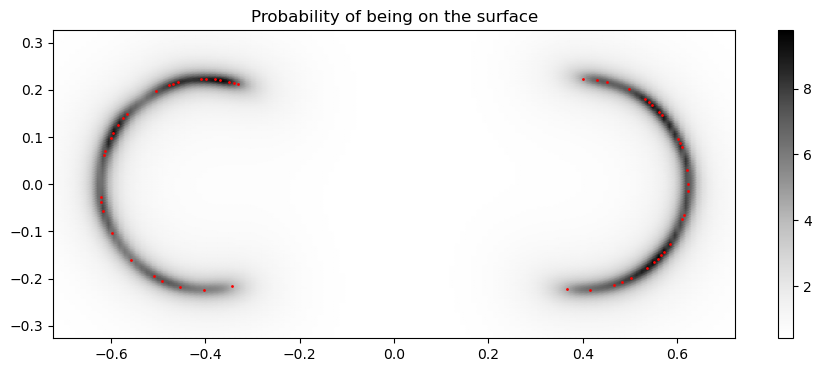

In [8]:
model_bin.predict()

In [9]:
model_bin.set_test_data(pc[1:3, :], lp[1:3, :])

tensor([[1.0000e+00, 9.9867e-01, 9.9468e-01,  ..., 3.4416e-11, 2.8357e-11,
         4.8195e-09],
        [9.9867e-01, 1.0000e+00, 9.9866e-01,  ..., 4.3542e-11, 3.6730e-11,
         5.4804e-09],
        [9.9468e-01, 9.9866e-01, 1.0000e+00,  ..., 5.4952e-11, 4.7462e-11,
         6.2157e-09],
        ...,
        [3.4416e-11, 4.3542e-11, 5.4952e-11,  ..., 1.0000e+00, 5.8142e-02,
         2.3093e-02],
        [2.8357e-11, 3.6730e-11, 4.7462e-11,  ..., 5.8142e-02, 1.0000e+00,
         9.4605e-06],
        [4.8195e-09, 5.4804e-09, 6.2157e-09,  ..., 2.3093e-02, 9.4605e-06,
         1.0000e+00]], grad_fn=<AddBackward0>)
tensor([0.0216, 0.0226, 0.0236,  ..., 0.0037, 0.0036, 0.0035],
       grad_fn=<MvBackward0>)
tensor([[1.0000e+00, 9.9839e-01, 9.9357e-01,  ..., 7.9817e-11, 5.7979e-03,
         9.6742e-10],
        [9.9839e-01, 1.0000e+00, 9.9839e-01,  ..., 1.0757e-10, 6.1375e-03,
         1.3518e-09],
        [9.9357e-01, 9.9839e-01, 1.0000e+00,  ..., 1.4451e-10, 6.4760e-03,
         1.8830e-0

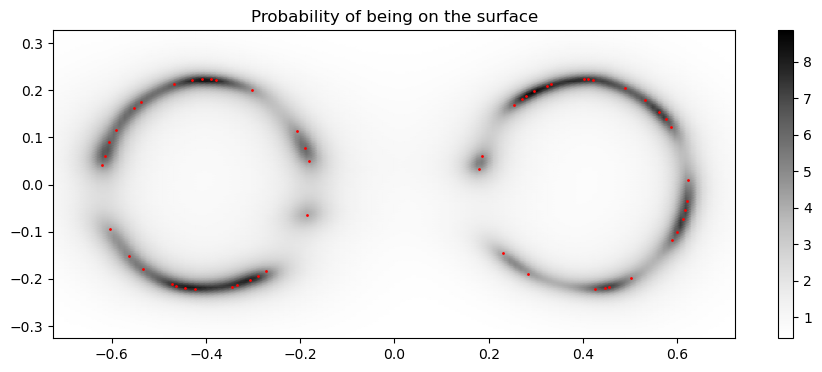

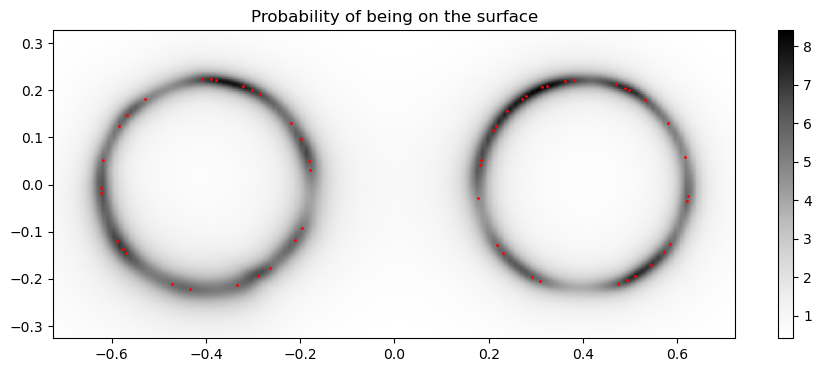

In [10]:
model_bin.predict()